In [35]:
import pandas as pd

import math

import scipy.stats as stats

from matplotlib import pyplot as plt

from matplotlib import patches as mpatches

import numpy as np

import statsmodels.api as sm

from scipy.stats import pearsonr

pd.options.display.min_rows = 20

pd.options.display.max_rows = 20

In [34]:
zobje = pd.read_csv("Zobje.csv")
zobje_vc = (zobje[zobje["NACIN"]=="VC"])[["DOLZINA", "KOLICINA"]]
zobje_oj = (zobje[zobje["NACIN"]=="OJ"])[["DOLZINA", "KOLICINA"]].reset_index(drop=True)

def nacin(x):
    if x == "VC":
        return 0.0
    else:
        return 1.0

zobje["NACIN"] = zobje["NACIN"].apply(lambda x: nacin(x))
zobje["NACIN*KOLICINA"] = zobje["NACIN"]*zobje["KOLICINA"]
print(zobje)

    DOLZINA  NACIN  KOLICINA  NACIN*KOLICINA
0       4.2    0.0       0.5             0.0
1      11.5    0.0       0.5             0.0
2       7.3    0.0       0.5             0.0
3       5.8    0.0       0.5             0.0
4       6.4    0.0       0.5             0.0
5      10.0    0.0       0.5             0.0
6      11.2    0.0       0.5             0.0
7      11.2    0.0       0.5             0.0
8       5.2    0.0       0.5             0.0
9       7.0    0.0       0.5             0.0
..      ...    ...       ...             ...
50     25.5    1.0       2.0             2.0
51     26.4    1.0       2.0             2.0
52     22.4    1.0       2.0             2.0
53     24.5    1.0       2.0             2.0
54     24.8    1.0       2.0             2.0
55     30.9    1.0       2.0             2.0
56     26.4    1.0       2.0             2.0
57     27.3    1.0       2.0             2.0
58     29.4    1.0       2.0             2.0
59     23.0    1.0       2.0             2.0

[60 rows 

                            OLS Regression Results                            
Dep. Variable:                DOLZINA   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     105.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.23e-14
Time:                        22:42:42   Log-Likelihood:                -175.70
No. Observations:                  60   AIC:                             355.4
Df Residuals:                      58   BIC:                             359.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4225      1.260      5.890      0.0

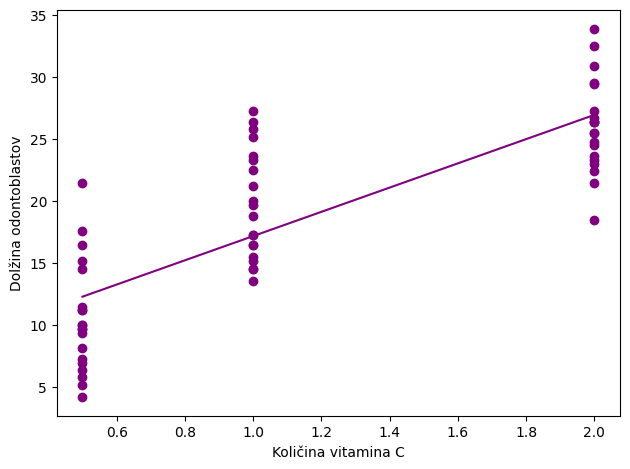

In [32]:
neodvisna = zobje["KOLICINA"]
odvisna = zobje["DOLZINA"]
neodvisna = sm.add_constant(neodvisna)
reg = sm.OLS(odvisna, neodvisna).fit()
koef = reg.params
print(reg.summary())
c0, c1 = koef["const"], koef["KOLICINA"]

x = np.linspace(0.5, 2.0, 100)
fig, ax = plt.subplots()
ax.set_facecolor('white')
plt.scatter(zobje["KOLICINA"], zobje["DOLZINA"], c="purple")
plt.plot(x, c0 * np.ones(100) + c1 * x, "purple")
ax.set_xlabel("Količina vitamina C")
ax.set_ylabel("Dolžina odontoblastov")
ax.grid(False)
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                DOLZINA   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.36
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           6.52e-16
Time:                        13:15:29   Log-Likelihood:                -167.48
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.2950      1.581      2.

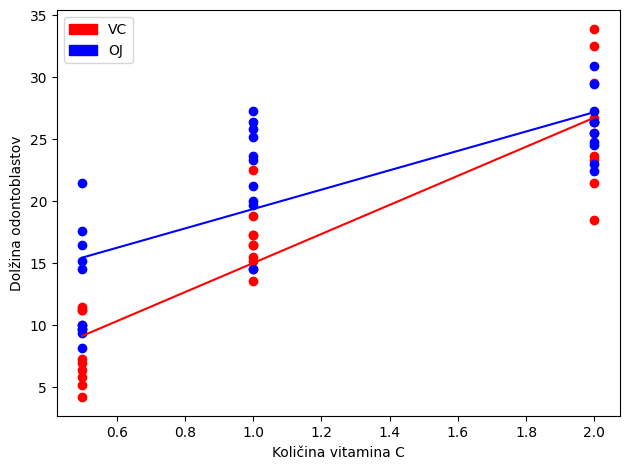

In [37]:
neodvisna_alt = zobje[["NACIN", "KOLICINA", "NACIN*KOLICINA"]]
odvisna_alt = zobje["DOLZINA"]
neodvisna_alt = sm.add_constant(neodvisna_alt)
reg_alt = sm.OLS(odvisna_alt, neodvisna_alt).fit()
koef_alt = reg_alt.params
print(reg_alt.summary())
c0_alt, c1_alt, c2_alt, c3_alt = koef_alt["const"], koef_alt["NACIN"], koef_alt["KOLICINA"], koef_alt["NACIN*KOLICINA"]

y_vc = zobje_vc["DOLZINA"]
x_vc = zobje_vc["KOLICINA"]
y_oj = zobje_oj["DOLZINA"]
x_oj = zobje_oj["KOLICINA"]

x = np.linspace(0.5, 2.0, 100)
fig, ax = plt.subplots()
ax.set_facecolor('white')
plt.scatter(x_vc, y_vc, c="red")
plt.scatter(x_oj, y_oj, c="blue")
rdeca = mpatches.Patch(color="red", label="VC")
modra = mpatches.Patch(color="blue", label="OJ")
plt.plot(x, c0_alt * np.ones(100) + c2_alt * x, "r")
plt.plot(x, (c0_alt + c1_alt) * np.ones(100) + (c2_alt + c3_alt) * x, "b")
ax.set_xlabel("Količina vitamina C")
ax.set_ylabel("Dolžina odontoblastov")
ax.legend(handles=[rdeca, modra])
ax.grid(False)
plt.tight_layout()
plt.show()